##### Copyright 2025 Google LLC.

In [1]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Day 1 - Prompting

Welcome to the Kaggle 5-day Generative AI course!

This notebook will show you how to get started with the Gemini API and walk you through some of the example prompts and techniques that you can also read about in the Prompting whitepaper. You don't need to read the whitepaper to use this notebook, but the papers will give you some theoretical context and background to complement this interactive notebook.


## Before you begin

In this notebook, you'll start exploring prompting using the Python SDK and AI Studio. For some inspiration, you might enjoy exploring some apps that have been built using the Gemini family of models. Here are a few that we like, and we think you will too.

* [TextFX](https://textfx.withgoogle.com/) is a suite of AI-powered tools for rappers, made in collaboration with Lupe Fiasco,
* [SQL Talk](https://sql-talk-r5gdynozbq-uc.a.run.app/) shows how you can talk directly to a database using the Gemini API,
* [NotebookLM](https://notebooklm.google/) uses Gemini models to build your own personal AI research assistant.


## For help

**Common issues are covered in the [FAQ and troubleshooting guide](https://www.kaggle.com/code/markishere/day-0-troubleshooting-and-faqs).**

## New for Gemini 2.0!

This course material was first launched in November 2024. The AI and LLM space is moving incredibly fast, so we have made some updates to use the latest models and capabilities.

* These codelabs have been updated to use the Gemini 2.0 family of models.
* The Python SDK has been updated from `google-generativeai` to the new, unified [`google-genai`](https://pypi.org/project/google-genai) SDK.
  * This new SDK works with both the developer Gemini API as well as Google Cloud Vertex AI, and switching is [as simple as changing some fields](https://pypi.org/project/google-genai/#:~:text=.Client%28%29-,API%20Selection,-By%20default%2C%20the).
* New model capabilities have been added to the relevant codelabs, such as "thinking mode" in this lab.
* Day 1 includes a new [Evaluation codelab](https://www.kaggle.com/code/markishere/day-1-evaluation-and-structured-output).

## Get started with the Gemini API

All of the exercises in this notebook will use the [Gemini API](https://ai.google.dev/gemini-api/) by way of the [Python SDK](https://pypi.org/project/google-genai/). Each of these prompts can be accessed directly in [Google AI Studio](https://aistudio.google.com/) too, so if you would rather use a web interface and skip the code for this activity, look for the <img src="https://ai.google.dev/site-assets/images/marketing/home/icon-ais.png" style="height: 24px" height=24/> AI Studio link on each prompt.

Next, you will need to add your API key to your Kaggle Notebook as a Kaggle User Secret.

![](https://storage.googleapis.com/kaggle-media/Images/5dgai_1.png)
![](https://storage.googleapis.com/kaggle-media/Images/5dgai_2.png)
![](https://storage.googleapis.com/kaggle-media/Images/5dgai_3.png)
![](https://storage.googleapis.com/kaggle-media/Images/5dgai_4.png)

### Install the SDK

In [2]:
!pip uninstall -qy jupyterlab  # Remove unused packages from Kaggle's base image that conflict
!pip install -U -q "google-genai==1.7.0"

Import the SDK and some helpers for rendering the output.

In [3]:
from google import genai
from google.genai import types

from IPython.display import HTML, Markdown, display

Set up a retry helper. This allows you to "Run all" without worrying about per-minute quota.

In [4]:
from google.api_core import retry


is_retriable = lambda e: (isinstance(e, genai.errors.APIError) and e.code in {429, 503})

genai.models.Models.generate_content = retry.Retry(
    predicate=is_retriable)(genai.models.Models.generate_content)

### Set up your API key

To run the following cell, your API key must be stored it in a [Kaggle secret](https://www.kaggle.com/discussions/product-feedback/114053) named `GOOGLE_API_KEY`.

If you don't already have an API key, you can grab one from [AI Studio](https://aistudio.google.com/app/apikey). You can find [detailed instructions in the docs](https://ai.google.dev/gemini-api/docs/api-key).

To make the key available through Kaggle secrets, choose `Secrets` from the `Add-ons` menu and follow the instructions to add your key or enable it for this notebook.

In [5]:
from kaggle_secrets import UserSecretsClient

GOOGLE_API_KEY = UserSecretsClient().get_secret("GOOGLE_API_KEY")

If you received an error response along the lines of `No user secrets exist for kernel id ...`, then you need to add your API key via `Add-ons`, `Secrets` **and** enable it.

![Screenshot of the checkbox to enable GOOGLE_API_KEY secret](https://storage.googleapis.com/kaggle-media/Images/5gdai_sc_3.png)
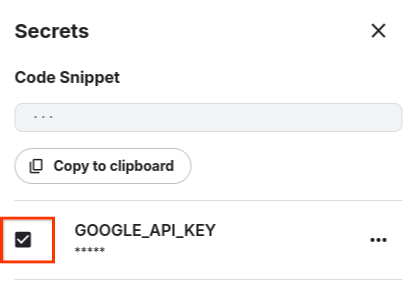

### Run your first prompt

In this step, you will test that your API key is set up correctly by making a request.

The Python SDK uses a [`Client` object](https://googleapis.github.io/python-genai/genai.html#genai.client.Client) to make requests to the API. The client lets you control which back-end to use (between the Gemini API and Vertex AI) and handles authentication (the API key).

The `gemini-2.0-flash` model has been selected here.

**Note**: If you see a `TransportError` on this step, you may need to **🔁 Factory reset** the notebook one time.

In [6]:
client = genai.Client(api_key=GOOGLE_API_KEY)

response = client.models.generate_content(
    model="gemini-2.0-flash",
    contents="Explain AI to me like I'm a kid.")

print(response.text)

Okay, imagine you have a really smart puppy. It doesn't know anything at first. But you start showing it pictures of cats and dogs, and every time you show it a dog, you say "Dog!" and every time it's a cat, you say "Cat!".

After a while, the puppy starts to learn! It sees a new picture, and it can guess if it's a cat or a dog based on what you taught it.

That puppy learning is kind of like AI. AI stands for Artificial Intelligence. It means making computers smart like people, so they can learn and solve problems all by themselves!

Instead of pictures of cats and dogs, computers learn from HUGE amounts of information, like millions and millions of pictures, words, and sounds!

**So, AI is like teaching a computer to:**

*   **Learn:** Like your puppy, AI can learn from lots of examples.
*   **Think:** It can use what it learned to figure things out.
*   **Do things:** It can then use its "thinking" to do things like recognize faces, play games, or even write stories!

**You use AI a

The response often comes back in markdown format, which you can render directly in this notebook.

In [7]:
Markdown(response.text)

Okay, imagine you have a really smart puppy. It doesn't know anything at first. But you start showing it pictures of cats and dogs, and every time you show it a dog, you say "Dog!" and every time it's a cat, you say "Cat!".

After a while, the puppy starts to learn! It sees a new picture, and it can guess if it's a cat or a dog based on what you taught it.

That puppy learning is kind of like AI. AI stands for Artificial Intelligence. It means making computers smart like people, so they can learn and solve problems all by themselves!

Instead of pictures of cats and dogs, computers learn from HUGE amounts of information, like millions and millions of pictures, words, and sounds!

**So, AI is like teaching a computer to:**

*   **Learn:** Like your puppy, AI can learn from lots of examples.
*   **Think:** It can use what it learned to figure things out.
*   **Do things:** It can then use its "thinking" to do things like recognize faces, play games, or even write stories!

**You use AI all the time! For example:**

*   When you ask Siri or Alexa a question, that's AI figuring out what you mean.
*   When you watch a movie and Netflix recommends another one you might like, that's AI guessing your taste!
*   When you use a GPS to get directions, that's AI figuring out the best route!

So, AI is like a super-smart computer that can learn and help us with all sorts of things! It's still new and growing, but it's already making a big difference in the world!


### Start a chat

The previous example uses a single-turn, text-in/text-out structure, but you can also set up a multi-turn chat structure too.

In [8]:
chat = client.chats.create(model='gemini-2.0-flash', history=[])
response = chat.send_message('Hello! My name is Zlork.')
print(response.text)

Greetings, Zlork! It's a pleasure to meet you. How can I help you today?



In [9]:
response = chat.send_message('Can you tell me something interesting about dinosaurs?')
print(response.text)

Okay, here's something interesting about dinosaurs:

**Some dinosaurs, like the Ornithomimus, were likely omnivores with a penchant for eating eggs, including their own!**

While Ornithomimus (meaning "bird mimic") was long thought to be a purely herbivorous dinosaur due to its beak-like mouth, recent analysis of fossilized Ornithomimus skeletons has shown evidence of a diverse diet. Bone analysis revealed the presence of nitrogen isotopes associated with consuming meat or eggs. Since they were likely fast and agile, they probably snacked on insects, small animals, and...yes...even other dinosaur eggs. This highlights the fascinating complexity of the dinosaur food web and the fact that our understanding of their diets is constantly evolving.



While you have the `chat` object alive, the conversation state
persists. Confirm that by asking if it knows the user's name.

In [10]:
response = chat.send_message('Do you remember what my name is?')
print(response.text)

Yes, your name is Zlork.



### Choose a model

The Gemini API provides access to a number of models from the Gemini model family. Read about the available models and their capabilities on the [model overview page](https://ai.google.dev/gemini-api/docs/models/gemini).

In this step you'll use the API to list all of the available models.

In [11]:
for model in client.models.list():
  print(model.name)

models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-2.5-pro-exp-03-25
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-2.0-pro-exp
models/gemini-2.0-pro-exp-02-05
models/gemini-exp-1206
models/gemini-2.0-flash-thinking-exp-01-21
models/gemini-2.0-flash-thinking

The [`models.list`](https://ai.google.dev/api/models#method:-models.list) response also returns additional information about the model's capabilities, like the token limits and supported parameters.

In [12]:
from pprint import pprint

for model in client.models.list():
  if model.name == 'models/gemini-2.0-flash':
    pprint(model.to_json_dict())
    break

{'description': 'Gemini 2.0 Flash',
 'display_name': 'Gemini 2.0 Flash',
 'input_token_limit': 1048576,
 'name': 'models/gemini-2.0-flash',
 'output_token_limit': 8192,
 'supported_actions': ['generateContent', 'countTokens'],
 'tuned_model_info': {},
 'version': '2.0'}


## Explore generation parameters



### Output length

When generating text with an LLM, the output length affects cost and performance. Generating more tokens increases computation, leading to higher energy consumption, latency, and cost.

To stop the model from generating tokens past a limit, you can specify the `max_output_tokens` parameter when using the Gemini API. Specifying this parameter does not influence the generation of the output tokens, so the output will not become more stylistically or textually succinct, but it will stop generating tokens once the specified length is reached. Prompt engineering may be required to generate a more complete output for your given limit.

In [13]:
from google.genai import types

short_config = types.GenerateContentConfig(max_output_tokens=200)

response = client.models.generate_content(
    model='gemini-2.0-flash',
    config=short_config,
    contents='Write a 1000 word essay on the importance of olives in modern society.')

Markdown(response.text)

## The Humble Olive: A Cornerstone of Modern Society

The olive, a seemingly simple fruit, boasts a legacy far richer and more complex than its unassuming appearance suggests.  From its ancient roots in the Mediterranean Basin to its ubiquitous presence on modern tables, the olive and its myriad derivatives have permeated cultures, economies, and lifestyles across the globe. While often taken for granted, the olive’s importance in modern society extends far beyond its culinary appeal, touching upon economic stability, health and wellness, and even contributing to cultural identity and environmental sustainability.  Understanding the multifaceted role of the olive reveals its undeniable significance in shaping the world we live in.

One of the most readily apparent aspects of the olive's importance lies in its profound economic impact. Olive oil, the liquid gold extracted from the fruit, is a cornerstone of numerous economies, particularly in the Mediterranean region.  Countries like Spain, Italy, Greece, and Tunisia are significant producers, relying heavily on olive cultivation and processing for employment and export revenue

In [14]:
response = client.models.generate_content(
    model='gemini-2.0-flash',
    config=short_config,
    contents='Write a short poem on the importance of olives in modern society.')

Markdown(response.text)

From groves of green to tables spread,
A tiny fruit, a story read.
In oil that gleams, a flavor bright,
On pizzas piled, a welcome sight.

A tapenade, a salty treat,
Mediterranean sun, can't be beat.
From cocktails stirred to salads tossed,
The humble olive, never lost.

A symbol old, of peace and grace,
Still holds its own in time and space.
A modern staple, small and bold,
A taste of history, to have and hold.


In [15]:
response = client.models.generate_content(
    model='gemini-2.0-flash',
    config=short_config,
    contents='Write a full script for the movie Rocky IX.')

Markdown(response.text)

## Rocky IX: The Final Round

**Logline:** Years after retiring from boxing and battling his demons, a grief-stricken and aging Rocky Balboa mentors a young, talented but troubled female boxer who is haunted by the death of her own family. Together, they find solace and strength in each other, battling not just opponents in the ring but also the ghosts of their pasts.

**Characters:**

*   **Rocky Balboa (78):** Aging, wise, still carries the weight of past losses, but retains his indomitable spirit.
*   **Adriana "Ari" Vargas (25):** A gifted but emotionally scarred boxer with raw talent and a fierce determination.
*   **Marco Vargas (50s):** Ari's uncle and reluctant guardian, a former amateur boxer who fears for her safety.
*   **Tommy "The Wrecking Ball" Hayes (30s):** A dominant, arrogant, and ruthless champion

In [16]:
response = client.models.generate_content(
    model='gemini-2.0-flash',
    config=short_config,
    contents='Write a short description of young poor Rocky Balboa')

Markdown(response.text)

Young Rocky Balboa is a small-time, struggling Italian-American boxer from the streets of Philadelphia. In his late 20s, he scrapes by as a debt collector for a local loan shark, yearning for more than his meager existence. While his boxing career has stalled, fighting in dingy clubs for little money and even less respect, he still clings to the hope of proving himself and escaping his dead-end life. Though rough around the edges and seemingly directionless, beneath his tough exterior lies a good heart, a sharp wit, and an unwavering determination to make something of himself, even if it's just to go the distance.


Explore with your own prompts. Try a prompt with a restrictive output limit and then adjust the prompt to work within that limit.

### Temperature

Temperature controls the degree of randomness in token selection. Higher temperatures result in a higher number of candidate tokens from which the next output token is selected, and can produce more diverse results, while lower temperatures have the opposite effect, such that a temperature of 0 results in greedy decoding, selecting the most probable token at each step.

Temperature doesn't provide any guarantees of randomness, but it can be used to "nudge" the output somewhat.

In [17]:
high_temp_config = types.GenerateContentConfig(temperature=2.0)


for _ in range(5):
  response = client.models.generate_content(
      model='gemini-2.0-flash',
      config=high_temp_config,
      contents='Pick a random colour... (respond in a single word)')

  if response.text:
    print(response.text, '-' * 25)

Mauve.
 -------------------------
Azure
 -------------------------
Magenta
 -------------------------
Azure
 -------------------------
Teal
 -------------------------


Now try the same prompt with temperature set to zero. Note that the output is not completely deterministic, as other parameters affect token selection, but the results will tend to be more stable.

In [18]:
low_temp_config = types.GenerateContentConfig(temperature=0.0)

for _ in range(5):
  response = client.models.generate_content(
      model='gemini-2.0-flash',
      config=low_temp_config,
      contents='Pick a random colour... (respond in a single word)')

  if response.text:
    print(response.text, '-' * 25)

Azure
 -------------------------
Azure
 -------------------------
Azure
 -------------------------
Azure
 -------------------------
Azure
 -------------------------


### Top-P

Like temperature, the top-P parameter is also used to control the diversity of the model's output.

Top-P defines the probability threshold that, once cumulatively exceeded, tokens stop being selected as candidates. A top-P of 0 is typically equivalent to greedy decoding, and a top-P of 1 typically selects every token in the model's vocabulary.

You may also see top-K referenced in LLM literature. Top-K is not configurable in the Gemini 2.0 series of models, but can be changed in older models. Top-K is a positive integer that defines the number of most probable tokens from which to select the output token. A top-K of 1 selects a single token, performing greedy decoding.


Run this example a number of times, change the settings and observe the change in output.

In [19]:
model_config = types.GenerateContentConfig(
    # These are the default values for gemini-2.0-flash.
    temperature=1.0,
    top_p=0.95,
)

story_prompt = "You are a creative writer. Write a short story about a cat who goes on an adventure."
response = client.models.generate_content(
    model='gemini-2.0-flash',
    config=model_config,
    contents=story_prompt)

print(response.text)

Jasper was no ordinary cat. While his brethren dozed in sunbeams and batted at dust bunnies, Jasper dreamt of faraway lands, of towering mountains and shimmering oceans. He devoured, or rather, sniffed attentively, the National Geographic magazines that Mrs. Higgins, his owner, left scattered on the coffee table. He yearned for more than the bland beige of his suburban life.

One Tuesday morning, fueled by a particularly vivid dream involving a field of catnip the size of a football stadium, Jasper decided he’d had enough. He waited until Mrs. Higgins was distracted by a phone call and, with a flick of his tail and a silent prayer to the Great Cat Spirit, he slipped out the back door.

The world exploded with new sensations. The sharp scent of damp earth, the chirping cacophony of unseen birds, the terrifying rumble of passing cars – it was overwhelming and intoxicating. He followed a winding path through overgrown hedges, his emerald eyes wide with wonder.

His journey led him to a bu

In [20]:
model_config = types.GenerateContentConfig(
    # These are the default values for gemini-2.0-flash.
    temperature=2.0,
    top_p=1.0,
)

story_prompt = "You are a creative writer. Write a short story about a cat who goes on an adventure."
response = client.models.generate_content(
    model='gemini-2.0-flash',
    config=model_config,
    contents=story_prompt)

print(response.text)

Mittens, a calico of magnificent disdain, decided she was over it. The velvet cushion had become a sentence, the sunbeam a tired performance, and Thomas from next door, his relentless preening insufferable. She craved paprika smells, precarious branches, the kind of thrills that made your whiskers vibrate. Today, her grand purrivate adventure would commence.

Thus motivated, she slipped out a not nearly a tall enough crack where the kitchen screened ddoor had warped and stalk down out of back yard through neighborhood and slipped out onto neighborhood's backstreets. The first hurdle was the dread highway underpass below the overpass street she had come from, black mouths. From the corner store, a dizzying swirl and she would slip passed traffic. 

With this resolved like a plan ( Mitten disliked the name like that that sound of planning.), ,

Then ,

One hot afternoon , passing an antique house under shady oak grove was . Mittens watched at house corner, old wrought-iron swing,

Sippin

In [21]:
model_config = types.GenerateContentConfig(
    # These are the default values for gemini-2.0-flash.
    temperature=0.0,
    top_p=0.0,
)

story_prompt = "You are a creative writer. Write a short story about a cat who goes on an adventure."
response = client.models.generate_content(
    model='gemini-2.0-flash',
    config=model_config,
    contents=story_prompt)

print(response.text)

Clementine, a calico of discerning tastes and a perpetually unimpressed expression, considered her life utterly predictable. Sunbeam naps, chasing dust bunnies, the occasional disdainful glance at the goldfish – it was all terribly…beige. She yearned for something more, a splash of vibrant color in her monochrome existence.

One blustery autumn afternoon, the back door, usually bolted tighter than a miser's purse, was ajar. A tantalizing gust of wind, carrying the scent of damp earth and decaying leaves, beckoned. Clementine, abandoning her nap mid-yawn, slipped through the crack.

The world exploded.

Gone was the familiar scent of lavender potpourri and tuna pate. Instead, a symphony of earthy aromas assaulted her senses. Towering trees, their leaves ablaze in fiery hues, scraped the sky. Squirrels, plump and audacious, chattered insults from branches. Clementine, usually a creature of comfort, felt a thrill course through her. This was it. Adventure.

Her first challenge was the Gre

## Prompting

This section contains some prompts from the chapter for you to try out directly in the API. Try changing the text here to see how each prompt performs with different instructions, more examples, or any other changes you can think of.

### Zero-shot

Zero-shot prompts are prompts that describe the request for the model directly.

<table align=left>
  <td>
    <a target="_blank" href="https://aistudio.google.com/prompts/1gzKKgDHwkAvexG5Up0LMtl1-6jKMKe4g"><img src="https://ai.google.dev/site-assets/images/marketing/home/icon-ais.png" style="height: 24px" height=24/> Open in AI Studio</a>
  </td>
</table>

In [22]:
model_config = types.GenerateContentConfig(
    temperature=0.1,
    top_p=1,
    max_output_tokens=5,
)

zero_shot_prompt = """Classify movie reviews as POSITIVE, NEUTRAL or NEGATIVE.
Review: "Her" is a disturbing study revealing the direction
humanity is headed if AI is allowed to keep evolving,
unchecked. I wish there were more movies like this masterpiece.
Sentiment: """

response = client.models.generate_content(
    model='gemini-2.0-flash',
    config=model_config,
    contents=zero_shot_prompt)

print(response.text)

POSITIVE



#### Enum mode

The models are trained to generate text, and while the Gemini 2.0 models are great at following instructions, other models can sometimes produce more text than you may wish for. In the preceding example, the model will output the label, but sometimes it can include a preceding "Sentiment" label, and without an output token limit, it may also add explanatory text afterwards. See [this prompt in AI Studio](https://aistudio.google.com/prompts/1gzKKgDHwkAvexG5Up0LMtl1-6jKMKe4g) for an example.

The Gemini API has an [Enum mode](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Enum.ipynb) feature that allows you to constrain the output to a fixed set of values.

In [23]:
import enum

class Sentiment(enum.Enum):
    POSITIVE = "positive"
    NEUTRAL = "neutral"
    NEGATIVE = "negative"


response = client.models.generate_content(
    model='gemini-1.5-flash', # test: changed from gemini-2.0-flash to 1.5
    config=types.GenerateContentConfig(
        response_mime_type="text/x.enum",
        response_schema=Sentiment
    ),
    contents=zero_shot_prompt)

print(response.text)

positive


When using constrained output like an enum, the Python SDK will attempt to convert the model's text response into a Python object automatically. It's stored in the `response.parsed` field.

In [24]:
enum_response = response.parsed
print(enum_response)
print(type(enum_response))

Sentiment.POSITIVE
<enum 'Sentiment'>


### One-shot and few-shot

Providing an example of the expected response is known as a "one-shot" prompt. When you provide multiple examples, it is a "few-shot" prompt.

<table align=left>
  <td>
    <a target="_blank" href="https://aistudio.google.com/prompts/1jjWkjUSoMXmLvMJ7IzADr_GxHPJVV2bg"><img src="https://ai.google.dev/site-assets/images/marketing/home/icon-ais.png" style="height: 24px" height=24/> Open in AI Studio</a>
  </td>
</table>


In [25]:
few_shot_prompt = """Parse a customer's pizza order into valid JSON:

EXAMPLE:
I want a small pizza with cheese, tomato sauce, and pepperoni.
JSON Response:
```
{
"size": "small",
"type": "normal",
"ingredients": ["cheese", "tomato sauce", "pepperoni"]
}
```

EXAMPLE:
Can I get a large pizza with tomato sauce, basil and mozzarella
JSON Response:
```
{
"size": "large",
"type": "normal",
"ingredients": ["tomato sauce", "basil", "mozzarella"]
}
```

ORDER:
"""

customer_order = "Give me a large with cheese & pineapple"

response = client.models.generate_content(
    model='gemini-2.0-flash',
    config=types.GenerateContentConfig(
        temperature=0.1,
        top_p=1,
        max_output_tokens=250,
    ),
    contents=[few_shot_prompt, customer_order])

print(response.text)

```json
{
"size": "large",
"type": "normal",
"ingredients": ["cheese", "pineapple"]
}
```



#### JSON mode

To provide control over the schema, and to ensure that you only receive JSON (with no other text or markdown), you can use the Gemini API's [JSON mode](https://github.com/google-gemini/cookbook/blob/main/quickstarts/JSON_mode.ipynb). This forces the model to constrain decoding, such that token selection is guided by the supplied schema.

In [26]:
import typing_extensions as typing

class PizzaOrder(typing.TypedDict):
    size: str
    ingredients: list[str]
    type: str


response = client.models.generate_content(
    model='gemini-2.0-flash',
    config=types.GenerateContentConfig(
        temperature=0.1,
        response_mime_type="application/json",
        response_schema=PizzaOrder,
    ),
    contents="Can I have a large dessert pizza with apple and chocolate")

print(response.text)

{
  "size": "large",
  "ingredients": ["apple", "chocolate"],
  "type": "dessert"
}


In [27]:
class ShortStory(typing.TypedDict):
    story: str
    characters: list[str]
    environment: str


response = client.models.generate_content(
    model='gemini-2.0-flash',
    config=types.GenerateContentConfig(
        temperature=0.1,
        response_mime_type="application/json",
        response_schema=ShortStory,
    ),
    contents="write a short story about a cat and a dog")

print(response.text)

{
  "story": "Clementine, a calico cat with a perpetually unimpressed expression, ruled the sunbeam on the living room rug. Barnaby, a golden retriever puppy overflowing with enthusiasm, saw it as an invitation to play. He'd bounce, tail wagging furiously, nudging Clementine with his wet nose. Clementine would respond with a hiss and a swat, claws sheathed just enough to make her point. This dance repeated itself daily. One afternoon, a thunderstorm raged outside. The power went out, plunging the house into darkness. A loud clap of thunder sent Barnaby scrambling under the coffee table, whimpering. Clementine, usually aloof, cautiously approached him. She nudged him gently, then settled down beside him, her purr a low rumble. Barnaby, comforted by her presence, leaned against her. The storm raged on, but in the darkness, a fragile truce was formed between the cat and the dog.",
  "characters": ["Clementine", "Barnaby"],
  "environment": "Living room during a thunderstorm"
}


### Chain of Thought (CoT)

Direct prompting on LLMs can return answers quickly and (in terms of output token usage) efficiently, but they can be prone to hallucination. The answer may "look" correct (in terms of language and syntax) but is incorrect in terms of factuality and reasoning.

Chain-of-Thought prompting is a technique where you instruct the model to output intermediate reasoning steps, and it typically gets better results, especially when combined with few-shot examples. It is worth noting that this technique doesn't completely eliminate hallucinations, and that it tends to cost more to run, due to the increased token count.

Models like the Gemini family are trained to be "chatty" or "thoughtful" and will provide reasoning steps without prompting, so for this simple example you can ask the model to be more direct in the prompt to force a non-reasoning response. Try re-running this step if the model gets lucky and gets the answer correct on the first try.

In [28]:
prompt = """When I was 4 years old, my partner was 3 times my age. Now, I
am 20 years old. How old is my partner? Return the answer directly."""

response = client.models.generate_content(
    model='gemini-2.0-flash',
    contents=prompt)

print(response.text)

52



Now try the same approach, but indicate to the model that it should "think step by step".

In [29]:
prompt = """When I was 4 years old, my partner was 3 times my age. Now,
I am 20 years old. How old is my partner? Let's think step by step."""

response = client.models.generate_content(
    model='gemini-2.0-flash',
    contents=prompt)

Markdown(response.text)

Here's how to solve this step-by-step:

1. **Find the age difference:** When you were 4, your partner was 3 times your age, meaning they were 4 * 3 = 12 years old.
2. **Calculate the age difference:** The age difference between you and your partner is 12 - 4 = 8 years.
3. **Determine your partner's current age:** Since the age difference remains constant, your partner is always 8 years older than you. Therefore, your partner is now 20 + 8 = 28 years old.

**Answer:** Your partner is now 28 years old.


In [30]:
class AnswerQuestion(typing.TypedDict):
    step_description: list[str]
    sub_answers: list[float]
    final_answer: float

prompt = """When I was 4 years old, my partner was 3 times my age. Now,
I am 20 years old. How old is my partner? Let's think step by step."""

response = client.models.generate_content(
    model='gemini-2.0-flash',
    config=types.GenerateContentConfig(
        temperature=0.1,
        response_mime_type="application/json",
        response_schema=AnswerQuestion,
    ),
    contents=prompt)

print(response.text)

{
  "step_description": [
    "When you were 4, your partner was 3 times your age, meaning they were 4 * 3 = 12 years old.",
    "This means your partner is 12 - 4 = 8 years older than you.",
    "Now that you are 20, your partner is 20 + 8 = 28 years old."
  ],
  "sub_answers": [
    12.0,
    8.0,
    28.0
  ],
  "final_answer": 28.0
}


### ReAct: Reason and act

In this example you will run a ReAct prompt directly in the Gemini API and perform the searching steps yourself. As this prompt follows a well-defined structure, there are frameworks available that wrap the prompt into easier-to-use APIs that make tool calls automatically, such as the LangChain example from the "Prompting" whitepaper.

To try this out with the Wikipedia search engine, check out the [Searching Wikipedia with ReAct](https://github.com/google-gemini/cookbook/blob/main/examples/Search_Wikipedia_using_ReAct.ipynb) cookbook example.


> Note: The prompt and in-context examples used here are from [https://github.com/ysymyth/ReAct](https://github.com/ysymyth/ReAct) which is published under an [MIT license](https://opensource.org/licenses/MIT), Copyright (c) 2023 Shunyu Yao.

<table align=left>
  <td>
    <a target="_blank" href="https://aistudio.google.com/prompts/18oo63Lwosd-bQ6Ay51uGogB3Wk3H8XMO"><img src="https://ai.google.dev/site-assets/images/marketing/home/icon-ais.png" style="height: 24px" height=24/> Open in AI Studio</a>
  </td>
</table>


In [31]:
model_instructions = """
Solve a question answering task with interleaving Thought, Action, Observation steps. Thought can reason about the current situation,
Observation is understanding relevant information from an Action's output and Action can be one of three types:
 (1) <search>entity</search>, which searches the exact entity on Wikipedia and returns the first paragraph if it exists. If not, it
     will return some similar entities to search and you can try to search the information from those topics.
 (2) <lookup>keyword</lookup>, which returns the next sentence containing keyword in the current context. This only does exact matches,
     so keep your searches short.
 (3) <finish>answer</finish>, which returns the answer and finishes the task.
"""

example1 = """Question
Musician and satirist Allie Goertz wrote a song about the "The Simpsons" character Milhouse, who Matt Groening named after who?

Thought 1
The question simplifies to "The Simpsons" character Milhouse is named after who. I only need to search Milhouse and find who it is named after.

Action 1
<search>Milhouse</search>

Observation 1
Milhouse Mussolini Van Houten is a recurring character in the Fox animated television series The Simpsons voiced by Pamela Hayden and created by Matt Groening.

Thought 2
The paragraph does not tell who Milhouse is named after, maybe I can look up "named after".

Action 2
<lookup>named after</lookup>

Observation 2
Milhouse was named after U.S. president Richard Nixon, whose middle name was Milhous.

Thought 3
Milhouse was named after U.S. president Richard Nixon, so the answer is Richard Nixon.

Action 3
<finish>Richard Nixon</finish>
"""

example2 = """Question
What is the elevation range for the area that the eastern sector of the Colorado orogeny extends into?

Thought 1
I need to search Colorado orogeny, find the area that the eastern sector of the Colorado orogeny extends into, then find the elevation range of the area.

Action 1
<search>Colorado orogeny</search>

Observation 1
The Colorado orogeny was an episode of mountain building (an orogeny) in Colorado and surrounding areas.

Thought 2
It does not mention the eastern sector. So I need to look up eastern sector.

Action 2
<lookup>eastern sector</lookup>

Observation 2
The eastern sector extends into the High Plains and is called the Central Plains orogeny.

Thought 3
The eastern sector of Colorado orogeny extends into the High Plains. So I need to search High Plains and find its elevation range.

Action 3
<search>High Plains</search>

Observation 3
High Plains refers to one of two distinct land regions

Thought 4
I need to instead search High Plains (United States).

Action 4
<search>High Plains (United States)</search>

Observation 4
The High Plains are a subregion of the Great Plains. From east to west, the High Plains rise in elevation from around 1,800 to 7,000 ft (550 to 2,130m).

Thought 5
High Plains rise in elevation from around 1,800 to 7,000 ft, so the answer is 1,800 to 7,000 ft.

Action 5
<finish>1,800 to 7,000 ft</finish>
"""

# Come up with more examples yourself, or take a look through https://github.com/ysymyth/ReAct/

To capture a single step at a time, while ignoring any hallucinated Observation steps, you will use `stop_sequences` to end the generation process. The steps are `Thought`, `Action`, `Observation`, in that order.

In [32]:
question = """Question
Who was the youngest author listed on the transformers NLP paper?
"""

# You will perform the Action; so generate up to, but not including, the Observation.
react_config = types.GenerateContentConfig(
    stop_sequences=["\nObservation"],
    system_instruction=model_instructions + example1 + example2,
)

# Create a chat that has the model instructions and examples pre-seeded.
react_chat = client.chats.create(
    model='gemini-2.0-flash',
    config=react_config,
)

resp = react_chat.send_message(question)
print(resp.text)

Thought 1
I need to find the Transformers NLP paper and then find the list of authors and then find the youngest author.

Action 1
<search>Transformers NLP paper</search>



Now you can perform this research yourself and supply it back to the model.

In [33]:
observation = """Observation 1
[1706.03762] Attention Is All You Need
Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
We propose a new simple network architecture, the Transformer, based solely on attention mechanisms, dispensing with recurrence and convolutions entirely.
"""
resp = react_chat.send_message(observation)
print(resp.text)

Thought 1
I have the list of authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin. I need to search these names to determine their ages and then determine who is the youngest. I will start by searching for Ashish Vaswani.

Action 1
<search>Ashish Vaswani</search>



This process repeats until the `<finish>` action is reached. You can continue running this yourself if you like, or try the [Wikipedia example](https://github.com/google-gemini/cookbook/blob/main/examples/Search_Wikipedia_using_ReAct.ipynb) to see a fully automated ReAct system at work.

## Thinking mode

The experiemental Gemini Flash 2.0 "Thinking" model has been trained to generate the "thinking process" the model goes through as part of its response. As a result, the Flash Thinking model is capable of stronger reasoning capabilities in its responses.

Using a "thinking mode" model can provide you with high-quality responses without needing specialised prompting like the previous approaches. One reason this technique is effective is that you induce the model to generate relevant information ("brainstorming", or "thoughts") that is then used as part of the context in which the final response is generated.

Note that when you use the API, you get the final response from the model, but the thoughts are not captured. To see the intermediate thoughts, try out [the thinking mode model in AI Studio](https://aistudio.google.com/prompts/new_chat?model=gemini-2.0-flash-thinking-exp-01-21).

<table align=left>
  <td>
    <a target="_blank" href="https://aistudio.google.com/prompts/1Z991SV7lZZZqioOiqIUPv9a9ix-ws4zk"><img src="https://ai.google.dev/site-assets/images/marketing/home/icon-ais.png" style="height: 24px" height=24/> Open in AI Studio</a>
  </td>
</table>

In [34]:
import io
from IPython.display import Markdown, clear_output


response = client.models.generate_content_stream(
    model='gemini-2.0-flash-thinking-exp',
    contents='Who was the youngest author listed on the transformers NLP paper?',
)

buf = io.StringIO()
for chunk in response:
    buf.write(chunk.text)
    # Display the response as it is streamed
    print(chunk.text, end='')

# And then render the finished response as formatted markdown.
clear_output()
Markdown(buf.getvalue())

The youngest author listed on the "Attention is All You Need" paper (the Transformer paper) is likely **Aidan N. Gomez**.

Here's why:

* **Aidan N. Gomez** was a PhD student at the University of Oxford at the time of publication (2017).  Being a PhD student typically places someone in their early to mid-twenties.
* The other authors, such as Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Łukasz Kaiser, and Illia Polosukhin, were all researchers at Google or affiliated with established research institutions.  They were generally further along in their careers, suggesting they were older than a PhD student.

While we don't have exact birthdates for all authors to definitively say with 100% certainty, based on career stage indicators, **Aidan N. Gomez** is highly probable to be the youngest author on the Transformer paper.

## Code prompting

### Generating code

The Gemini family of models can be used to generate code, configuration and scripts. Generating code can be helpful when learning to code, learning a new language or for rapidly generating a first draft.

It's important to be aware that since LLMs can make mistakes, and can repeat training data, it's essential to read and test your code first, and comply with any relevant licenses.

<table align=left>
  <td>
    <a target="_blank" href="https://aistudio.google.com/prompts/1YX71JGtzDjXQkgdes8bP6i3oH5lCRKxv"><img src="https://ai.google.dev/site-assets/images/marketing/home/icon-ais.png" style="height: 24px" height=24/> Open in AI Studio</a>
  </td>
</table>

In [35]:
# The Gemini models love to talk, so it helps to specify they stick to the code if that
# is all that you want.
code_prompt = """
Write a Python function to calculate the factorial of a number. No explanation, provide only the code.
"""

response = client.models.generate_content(
    model='gemini-2.0-flash',
    config=types.GenerateContentConfig(
        temperature=1,
        top_p=1,
        max_output_tokens=1024,
    ),
    contents=code_prompt)

Markdown(response.text)

```python
def factorial(n):
  """
  Calculate the factorial of a number.
  """
  if n == 0:
    return 1
  else:
    return n * factorial(n-1)
```


### Code execution

The Gemini API can automatically run generated code too, and will return the output.

<table align=left>
  <td>
    <a target="_blank" href="https://aistudio.google.com/prompts/11veFr_VYEwBWcLkhNLr-maCG0G8sS_7Z"><img src="https://ai.google.dev/site-assets/images/marketing/home/icon-ais.png" style="height: 24px" height=24/> Open in AI Studio</a>
  </td>
</table>

In [36]:
from pprint import pprint

config = types.GenerateContentConfig(
    tools=[types.Tool(code_execution=types.ToolCodeExecution())],
)

code_exec_prompt = """
Generate the first 14 odd prime numbers, then calculate their sum.
"""

response = client.models.generate_content(
    model='gemini-2.0-flash',
    config=config,
    contents=code_exec_prompt)

for part in response.candidates[0].content.parts:
  pprint(part.to_json_dict())
  print("-----")

{'text': 'Okay, I can do that. First, I need to generate the first 14 odd '
         'prime numbers. Recall that a prime number is a number greater than 1 '
         'that has only two divisors: 1 and itself. Also, odd numbers are '
         'integers not divisible by 2. The smallest prime number is 2, which '
         'is even, so we need to start with the next prime, 3. I will generate '
         'the list, then sum them.\n'
         '\n'}
-----
{'executable_code': {'code': 'primes = []\n'
                             'num = 3\n'
                             'while len(primes) < 14:\n'
                             '    is_prime = True\n'
                             '    for i in range(2, int(num**0.5) + 1):\n'
                             '        if num % i == 0:\n'
                             '            is_prime = False\n'
                             '            break\n'
                             '    if is_prime:\n'
                             '        primes.append(num)

This response contains multiple parts, including an opening and closing text part that represent regular responses, an `executable_code` part that represents generated code and a `code_execution_result` part that represents the results from running the generated code.

You can explore them individually.

In [37]:
for part in response.candidates[0].content.parts:
    if part.text:
        display(Markdown(part.text))
    elif part.executable_code:
        display(Markdown(f'```python\n{part.executable_code.code}\n```'))
    elif part.code_execution_result:
        if part.code_execution_result.outcome != 'OUTCOME_OK':
            display(Markdown(f'## Status {part.code_execution_result.outcome}'))

        display(Markdown(f'```\n{part.code_execution_result.output}\n```'))

Okay, I can do that. First, I need to generate the first 14 odd prime numbers. Recall that a prime number is a number greater than 1 that has only two divisors: 1 and itself. Also, odd numbers are integers not divisible by 2. The smallest prime number is 2, which is even, so we need to start with the next prime, 3. I will generate the list, then sum them.



```python
primes = []
num = 3
while len(primes) < 14:
    is_prime = True
    for i in range(2, int(num**0.5) + 1):
        if num % i == 0:
            is_prime = False
            break
    if is_prime:
        primes.append(num)
    num += 2

print(f'{primes=}')

import numpy as np
sum_of_primes = np.sum(primes)
print(f'{sum_of_primes=}')

```

```
primes=[3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]
sum_of_primes=np.int64(326)

```

The first 14 odd prime numbers are 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, and 47. Their sum is 326.


### Explaining code

The Gemini family of models can explain code to you too. In this example, you pass a [bash script](https://github.com/magicmonty/bash-git-prompt) and ask some questions.

<table align=left>
  <td>
    <a target="_blank" href="https://aistudio.google.com/prompts/1N7LGzWzCYieyOf_7bAG4plrmkpDNmUyb"><img src="https://ai.google.dev/site-assets/images/marketing/home/icon-ais.png" style="height: 24px" height=24/> Open in AI Studio</a>
  </td>
</table>

In [38]:
file_contents = !curl https://raw.githubusercontent.com/magicmonty/bash-git-prompt/refs/heads/master/gitprompt.sh

explain_prompt = f"""
Please explain what this file does at a very high level. What is it, and why would I use it?

```
{file_contents}
```
"""

response = client.models.generate_content(
    model='gemini-2.0-flash',
    contents=explain_prompt)

Markdown(response.text)

This file, named `git-prompt.sh`, is a shell script designed to enhance your command-line prompt with information about the current Git repository.

**In essence, it does this:**

1.  **Detects if you're in a Git repository.**
2.  **Gathers information about the repository's status:** current branch, staged changes, uncommitted changes, whether it's ahead or behind the remote, etc.
3.  **Formats this information** using colors and symbols.
4.  **Injects this formatted information into your command-line prompt** so you can always see the Git status at a glance.

**Why would you use it?**

*   **At-a-glance Git status:**  Immediately know the state of your Git repository (branch, changes, etc.) without needing to type `git status`. This is a huge productivity booster.
*   **Improved workflow:**  Reduces errors by making it clear which branch you're on and whether you have uncommitted changes.
*   **Customization:**  Highly customizable with themes, colors, and symbols to fit your preferences.

In other words, this script makes your command prompt "Git-aware," giving you a more informative and efficient command-line experience when working with Git repositories.  It's a popular tool for developers who frequently use Git.


## Learn more

To learn more about prompting in depth:

* Check out the whitepaper issued with today's content,
* Try out the apps listed at the top of this notebook ([TextFX](https://textfx.withgoogle.com/), [SQL Talk](https://sql-talk-r5gdynozbq-uc.a.run.app/) and [NotebookLM](https://notebooklm.google/)),
* Read the [Introduction to Prompting](https://ai.google.dev/gemini-api/docs/prompting-intro) from the Gemini API docs,
* Explore the Gemini API's [prompt gallery](https://ai.google.dev/gemini-api/prompts) and try them out in AI Studio,
* Check out the Gemini API cookbook for [inspirational examples](https://github.com/google-gemini/cookbook/blob/main/examples/) and [educational quickstarts](https://github.com/google-gemini/cookbook/blob/main/quickstarts/).

Be sure to check out the codelabs on day 3 too, where you will explore some more advanced prompting with code execution.

And please share anything exciting you have tried in the Discord!

*- [Mark McD](https://linktr.ee/markmcd)*